# Simulated Datasets for Causal Graph Analysis
test

## Objective
The goal of this project is to generate simulated/synthetic datasets with known underlying causal graphs or Directed Acyclic Graphs (DAGs) for my master thesis. These datasets will be used to train and evaluate the performance of autoformer models in accurately predicting outcomes based on their understanding of causal relationships.

## Methodology
1. Generate multiple simulated time series datasets, starting basic and adding complexity in steps
2. Include variables such as lagged variables, confounding variables (hidden or non-hidden), and noise settings for each variable.
3. Vary the data distributions, noise levels, and the presence or absence of key variables to test the robustness of the models.
4. Train autoformer models on the generated datasets.
5. Evaluate the models' performance in predicting outcomes and their ability to generalize across datasets with the same underlying causal structure but different dimensions.

## Expected Outcomes
By generating datasets with known causal graphs and training autoformer models on them, we aim to assess the models' capacity to capture and understand deep causal mechanisms rather than merely learning superficial patterns. This evaluation will provide insights into the robustness and generalization abilities of these models in the presence of variations in data distributions, noise levels, and variable availability.


## Dataset-1, simple relationships between variables (no autocorrelation, lag or non linear functions)
X: A root cause variable, generated from a uniform distribution.
Y: Influenced directly by X; the relationship is linear, with some added noise.
Z: Influenced by Y, also in a linear fashion with added noise.


          X          Y          Z
0  3.745401   7.668503  -9.777980
1  9.507143  17.678942 -17.803600
2  7.319939  15.020077 -17.277157
3  5.986585  12.583755 -11.443671
4  1.560186   3.680163  -3.556504


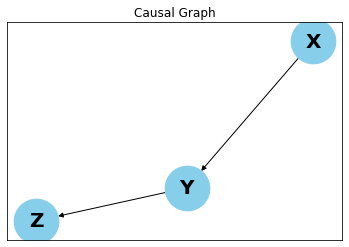

In [86]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
np.random.seed(42)

def generate_synthetic_data(n_samples=1000):
    # Generate X from a uniform distribution
    X = np.random.uniform(low=0, high=10, size=n_samples)
    # Generate Y as a linear function of X plus some Gaussian noise
    Y = 2*X + np.random.normal(loc=0, scale=1, size=n_samples)
    # Generate Z as a linear function of Y plus some Gaussian noise
    Z = -1*Y + np.random.normal(loc=0, scale=1.5, size=n_samples)
    
    data = pd.DataFrame({
        'X': X,
        'Y': Y,
        'Z': Z
    })
    
    return data

def plot_causal_graph():
    G = nx.DiGraph()
    G.add_edges_from([('X', 'Y'), ('Y', 'Z')])
    
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=20, font_weight='bold')
    plt.title('Causal Graph')
    plt.show()


dataset1 = generate_synthetic_data(n_samples=1000)
print(dataset1.head())
plot_causal_graph()


## Dataset-2, 2 variablas with non linear relationships and 1 confounding variable
C: (Confounder) affects both X and Y.
X: Affected by C.
Y: Affected by C and X through a non-linear relationship.


          C         X         Y
0  0.261881  0.176942  1.142771
1  0.923468  0.672343  1.211511
2 -1.047625 -0.626463  0.743635
3  0.724913  0.510300  1.014499
4  0.199748  0.080900  0.978014


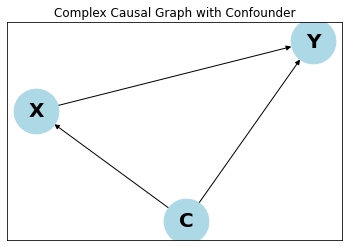

In [85]:

def generate_complex_data(n_samples=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=n_samples)
    # X is influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=n_samples)
    # Y is influenced by X and C in a non-linear way
    Y = np.square(X) + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=n_samples)
    
    data = pd.DataFrame({
        'C': C,
        'X': X,
        'Y': Y,

    })
    return data

def plot_complex_causal_graph():
    G = nx.DiGraph()
    G.add_edges_from([('C', 'X'), ('C', 'Y'), ('X', 'Y')])
    
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=20, font_weight='bold')
    plt.title('Complex Causal Graph with Confounder')
    plt.show()

dataset2 = generate_complex_data(n_samples=1000)
print(dataset2.head())
plot_complex_causal_graph()


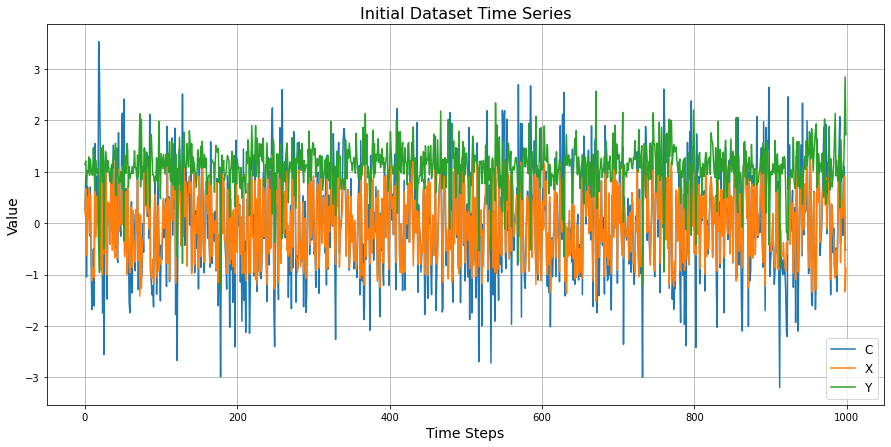

In [90]:
def plot_time_series(df, variables, title="Time Series Data"):
    """
    Plot selected variables from a DataFrame as time series data.

    Parameters:
    - df: DataFrame containing the data.
    - variables: List of column names (strings) in the DataFrame to plot.
    - title: Optional; title of the plot.
    """
    plt.figure(figsize=(15, 7))
    for var in variables:
        if var in df.columns:
            plt.plot(df[var], label=var)
        else:
            print(f"Variable '{var}' not found in the DataFrame.")
    plt.title(title, fontsize=16)
    plt.xlabel("Time Steps", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

plot_time_series(dataset2, ['C', 'X', 'Y'], "Initial Dataset Time Series")



## Dataset-3, multiple linear relationships with confounding & lagged variables



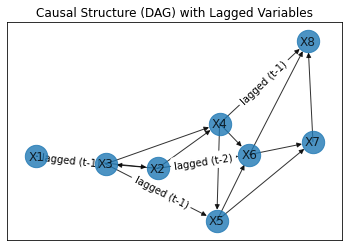

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.290088,-0.367930,-0.331435,2.228330,-0.936812,0.966196,0.247964,0.059178
1,0.043901,-0.421571,0.027154,-0.631322,-0.370757,-1.096987,-1.179591,-0.503690
2,0.930533,0.537516,-0.790318,0.803316,0.998380,-0.600350,0.456274,-0.673209
3,-0.660841,-0.892583,-1.836770,-0.759704,-1.196342,0.464174,-1.211601,-1.403708
4,-0.575186,-1.709652,-0.855421,-1.658030,-1.103867,-1.599875,1.304169,-0.017445


In [88]:
# Number of datapoints
n = 1000

X1 = np.random.normal(0, 1, n)
X2 = 0.5 * X1 + np.random.normal(0, 1, n)
X3 = 0.3 * X2 + 0.2 * np.roll(X1, 1) + np.random.normal(0, 1, n)  # Influenced by X2 and lagged X1
X4 = 0.2 * X3 + 0.4 * X2 + np.random.normal(0, 1, n)  # Influenced by X3 and X2
X5 = 0.6 * X4 + 0.1 * np.roll(X3, 1) + np.random.normal(0, 1, n)  # Influenced by X4 and lagged X3
X6 = 0.3 * X5 + 0.2 * X4 + 0.1 * np.roll(X2, 2) + np.random.normal(0, 1, n)  # Influenced by X5, X4, and lagged X2
X7 = 0.4 * X6 + 0.2 * X5 + np.random.normal(0, 1, n)  # Influenced by X6 and X5
X8 = 0.5 * X7 + 0.3 * X6 + 0.1 * np.roll(X4, 1) + np.random.normal(0, 1, n)  # Influenced by X7, X6, and lagged X4

dataset3 = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6, 'X7': X7, 'X8': X8})

dag = nx.DiGraph()
for var in dataset3.columns:
    dag.add_node(var)

# Add edges to the DAG based on the causal structure
dag.add_edge('X1', 'X2')
dag.add_edge('X1', 'X3', label='lagged (t-1)')
dag.add_edge('X2', 'X3')
dag.add_edge('X2', 'X4')
dag.add_edge('X3', 'X4')
dag.add_edge('X3', 'X5', label='lagged (t-1)')
dag.add_edge('X4', 'X5')
dag.add_edge('X4', 'X6')
dag.add_edge('X5', 'X6')
dag.add_edge('X5', 'X7')
dag.add_edge('X6', 'X7')
dag.add_edge('X6', 'X8')
dag.add_edge('X7', 'X8')
dag.add_edge('X4', 'X8', label='lagged (t-1)')
dag.add_edge('X2', 'X6', label='lagged (t-2)')

# Plot the DAG with lagged variable labels
pos = nx.spring_layout(dag)
nx.draw_networkx(dag, pos, with_labels=True, node_size=500, alpha=0.8, font_size=12, arrows=True)
labels = nx.get_edge_attributes(dag, 'label')
nx.draw_networkx_edge_labels(dag, pos, edge_labels=labels, font_size=10)
plt.title("Causal Structure (DAG) with Lagged Variables")
plt.show()
dataset3.head()